<a href="https://colab.research.google.com/github/johntanas/it1244project/blob/main/code/dataclean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
random_state=42

In [3]:
onlinedataset=True
if onlinedataset:
  url = "https://drive.google.com/file/d/1sPoe6p1zKBOZQcQWsTTl0wzE9WCreffo/view?usp=sharing"
  url='https://drive.google.com/uc?id=' + url.split('/')[-2]
  app_df=pd.read_csv(url,index_col=0)
else:
  pathtodataset="./content/credit_record.csv"
  app_df=pd.read_csv(pathtodataset,index_col=0)

In [4]:
app_df.head()

,id,gender,own_car,own_realty,num_child,income,income_type,education_level,family_status,house_type,birth_day,employment_length,mobile,work_phone,phone,email,job,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [5]:
app_df.describe()

,id,num_child,income,birth_day,employment_length,mobile,work_phone,phone,email,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [6]:
app_df["mobile"].unique()

array([1])

Everyone has a mobile phone, we should drop this redundant factor (cardinality=1) to reduce the dimesionality of our data

In [7]:
prev_df=app_df.drop(columns=["mobile"],inplace=True)

Removing multiple applications and keeping the latest one

In [8]:
app_df = app_df.sort_values("birth_day").drop_duplicates("id")

In [9]:
app_df=app_df.drop_duplicates(subset=app_df.columns.difference(["id"]))

In [10]:
app_df

,id,gender,own_car,own_realty,num_child,income,income_type,education_level,family_status,house_type,birth_day,employment_length,work_phone,phone,email,job,CNT_FAM_MEMBERS
53141,5163082,F,N,N,0,180000.0,Pensioner,Higher education,Married,House / apartment,-25201,365243,0,0,0,NaN,2.0
279211,6112238,F,N,Y,0,108000.0,Pensioner,Higher education,Single / not married,House / apartment,-25159,365243,0,1,0,NaN,1.0
40884,5116225,M,Y,Y,0,238500.0,Pensioner,Secondary / secondary special,Married,Office apartment,-25152,365243,0,0,0,NaN,2.0
155706,5735620,M,Y,N,0,202500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-25151,365243,0,0,0,NaN,2.0
3856,5023272,F,N,Y,0,76500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-25140,365243,0,0,0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363449,6508279,F,N,N,0,128646.0,Working,Incomplete higher,Single / not married,With parents,-7699,-242,1,0,0,Sales staff,1.0
239954,6018661,M,N,Y,0,144904.5,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-7688,-400,1,0,0,Sales staff,2.0
246588,6037219,M,Y,Y,0,80397.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-7680,-262,1,1,0,Sales staff,1.0
391724,6661175,F,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-7678,-209,0,0,1,Core staff,1.0


In [11]:
missing_values_count = app_df.isnull().sum()

In [12]:
missing_values_count

id                       0
gender                   0
own_car                  0
own_realty               0
num_child                0
income                   0
income_type              0
education_level          0
family_status            0
house_type               0
birth_day                0
employment_length        0
work_phone               0
phone                    0
email                    0
job                  27477
CNT_FAM_MEMBERS          0
dtype: int64

The only column with missing values is the job column.

There are some pensioners that are still working and the rest are unemployed. We will label the non-working pensioner with job of pensioner.

In [13]:
pensioners_not_working=app_df[app_df['employment_length']>=0]
pensioners_not_working["income_type"].unique()

array(['Pensioner'], dtype=object)

all the people with employment_length>= 0 (unemployed) are pensioners so we can simply fillna with `'Pensioner'` as only the job col is na

In [14]:
pensioners_not_working=pensioners_not_working.fillna('Pensioner')

In [15]:
pensioners_not_working['employment_length'].describe()

count     15687.0
mean     365243.0
std           0.0
min      365243.0
25%      365243.0
50%      365243.0
75%      365243.0
max      365243.0
Name: employment_length, dtype: float64

In [16]:
pensioners_not_working['birth_day'].describe()

count    15687.000000
mean    -21692.098107
std       1921.740404
min     -25201.000000
25%     -23010.000000
50%     -21929.000000
75%     -20789.000000
max      -8145.000000
Name: birth_day, dtype: float64

Having the pensioners with employment length = 365243 is both incorrect (1000 years) and will definitely affect the feature scaling of employment length. Thus , we propose that the retirement age is the median of the dataset 21929 (60 years old) and employment length which is long they have been pensioners will be max(median-age,0).

In [17]:
pd.options.mode.chained_assignment = None
pensioners_not_working["employment_length"]=pensioners_not_working.apply(lambda x : max(-21929-x["birth_day"],0),axis=1)

In [18]:
employed=app_df[app_df['employment_length']<0]

In [19]:
employed.describe()

,id,num_child,income,birth_day,employment_length,work_phone,phone,email,CNT_FAM_MEMBERS
count,7.439800e+04,74398.000000,7.439800e+04,74398.000000,74398.000000,74398.000000,74398.000000,74398.000000,74398.000000
mean,6.024974e+06,0.503589,1.853917e+05,-14680.676483,-2436.552595,0.245746,0.271459,0.110420,2.271876
std,5.840573e+05,0.766506,1.057179e+05,3547.992329,2311.215503,0.430531,0.444715,0.313414,0.936178
min,5.008805e+06,0.000000,2.700000e+04,-24834.000000,-17531.000000,0.000000,0.000000,0.000000,1.000000
25%,5.585654e+06,0.000000,1.215000e+05,-17383.000000,-3263.750000,0.000000,0.000000,0.000000,2.000000
50%,6.046222e+06,0.000000,1.575000e+05,-14469.500000,-1730.000000,0.000000,0.000000,0.000000,2.000000
75%,6.460661e+06,1.000000,2.250000e+05,-11768.000000,-816.000000,0.000000,1.000000,0.000000,3.000000
max,7.999738e+06,19.000000,6.750000e+06,-7489.000000,-12.000000,1.000000,1.000000,1.000000,20.000000


In [20]:
employed_pen=employed[employed["income_type"]=='Pensioner']
employed_pen[~employed_pen["job"].isna()]

,id,gender,own_car,own_realty,num_child,income,income_type,education_level,family_status,house_type,birth_day,employment_length,work_phone,phone,email,job,CNT_FAM_MEMBERS
435030,5270617,M,N,N,0,360000.0,Pensioner,Higher education,Single / not married,House / apartment,-21907,-4782,1,0,0,Managers,2.0
435251,5372348,F,N,N,0,126000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21840,-1328,0,0,0,Laborers,2.0
436438,5952203,M,N,Y,1,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21805,-4683,0,0,0,Laborers,3.0
437060,6153998,M,Y,Y,0,270000.0,Pensioner,Secondary / secondary special,Married,Municipal apartment,-21780,-1755,0,0,1,Core staff,2.0
436969,6116043,M,Y,Y,0,270000.0,Pensioner,Higher education,Married,Rented apartment,-21478,-276,0,0,0,Drivers,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435912,5730605,F,N,N,0,67500.0,Pensioner,Secondary / secondary special,Single / not married,With parents,-10148,-616,0,0,0,Laborers,1.0
436811,6076878,F,N,Y,0,202500.0,Pensioner,Higher education,Married,House / apartment,-9863,-2381,0,0,0,Core staff,2.0
437131,6192077,M,Y,N,0,184500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-9646,-3099,1,0,0,Drivers,2.0
435452,5464986,F,N,Y,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-9361,-336,0,0,0,Secretaries,2.0


Some pensioners can still have jobs but are receiving a pension

In [21]:
employed.isna().sum()

id                       0
gender                   0
own_car                  0
own_realty               0
num_child                0
income                   0
income_type              0
education_level          0
family_status            0
house_type               0
birth_day                0
employment_length        0
work_phone               0
phone                    0
email                    0
job                  11790
CNT_FAM_MEMBERS          0
dtype: int64

In [22]:
cond=employed['job'].notnull()
predict_df= employed[~cond]
df=employed[cond]

In [23]:
print(predict_df.shape)
print(df.shape)

(11790, 17)
(62608, 17)


Id is a redundant factor but we have to keep id for `predict_df` when we want to merge the predicted df later

In [24]:
train_df=df.drop("id",axis=1,inplace=False)

We can use a decision tree to predict the job of the person if we assume our data (n=62608) covers the majority of jobs that we will encounter (no outlier jobs). 

The following code is inspired by https://github.com/fastai/fastbook/blob/master/09_tabular.ipynb

In [25]:
from sklearn.model_selection import ShuffleSplit
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,export_text,plot_tree
from fastai.tabular.all import *

In [26]:
dep_var="job"

In [27]:
sss = ShuffleSplit(n_splits=1, test_size=0.2)
train_idx, valid_idx = next(sss.split(train_df))
splits = (list(train_idx),list(valid_idx))

In [28]:
procs = [Categorify]

In [29]:
cont,cat = cont_cat_split(train_df, 1, dep_var=dep_var)

In [30]:
to = TabularPandas(train_df, procs, cat, cont, y_names=dep_var, splits=splits)

In [31]:
len(to.train),len(to.valid)

(50086, 12522)

In [32]:
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

In [33]:
m = DecisionTreeClassifier(max_depth=10,random_state=random_state)
m.fit(xs, y)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [34]:
class_names2pass = sorted(train_df["job"].unique())

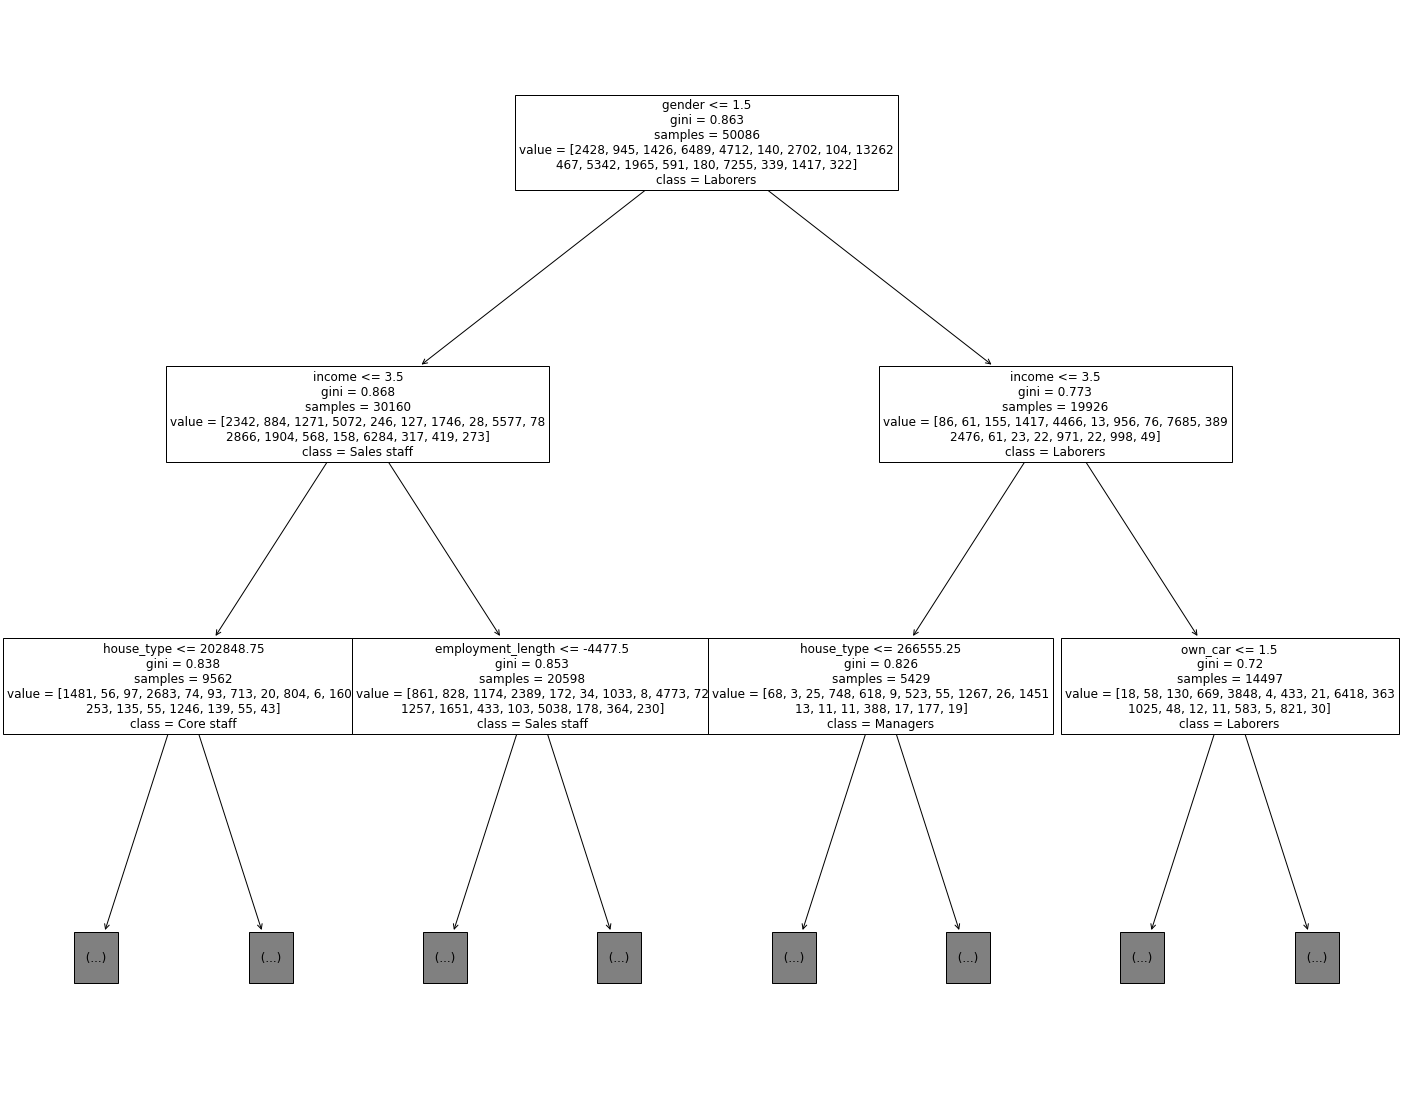

In [35]:
fig = plt.figure(figsize=(25,20))
var = plot_tree(m,feature_names=train_df.columns, class_names=class_names2pass,max_depth=2,fontsize=12)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

In [54]:
preds_dt=m.predict(valid_xs)

In [69]:
print(classification_report(preds_dt,valid_y,target_names=class_names2pass))

                       precision    recall  f1-score   support

          Accountants       0.10      0.18      0.13       342
       Cleaning staff       0.03      0.22      0.05        36
        Cooking staff       0.00      0.09      0.01        11
           Core staff       0.37      0.35      0.36      1674
              Drivers       0.26      0.34      0.30       874
             HR staff       0.00      0.00      0.00         0
High skill tech staff       0.02      0.16      0.03        61
             IT staff       0.00      0.00      0.00         0
             Laborers       0.59      0.39      0.47      5057
   Low-skill Laborers       0.01      0.25      0.02         4
             Managers       0.34      0.34      0.34      1347
       Medicine staff       0.13      0.28      0.17       236
Private service staff       0.00      0.00      0.00         0
        Realty agents       0.00      0.00      0.00         0
          Sales staff       0.49      0.32      0.39  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


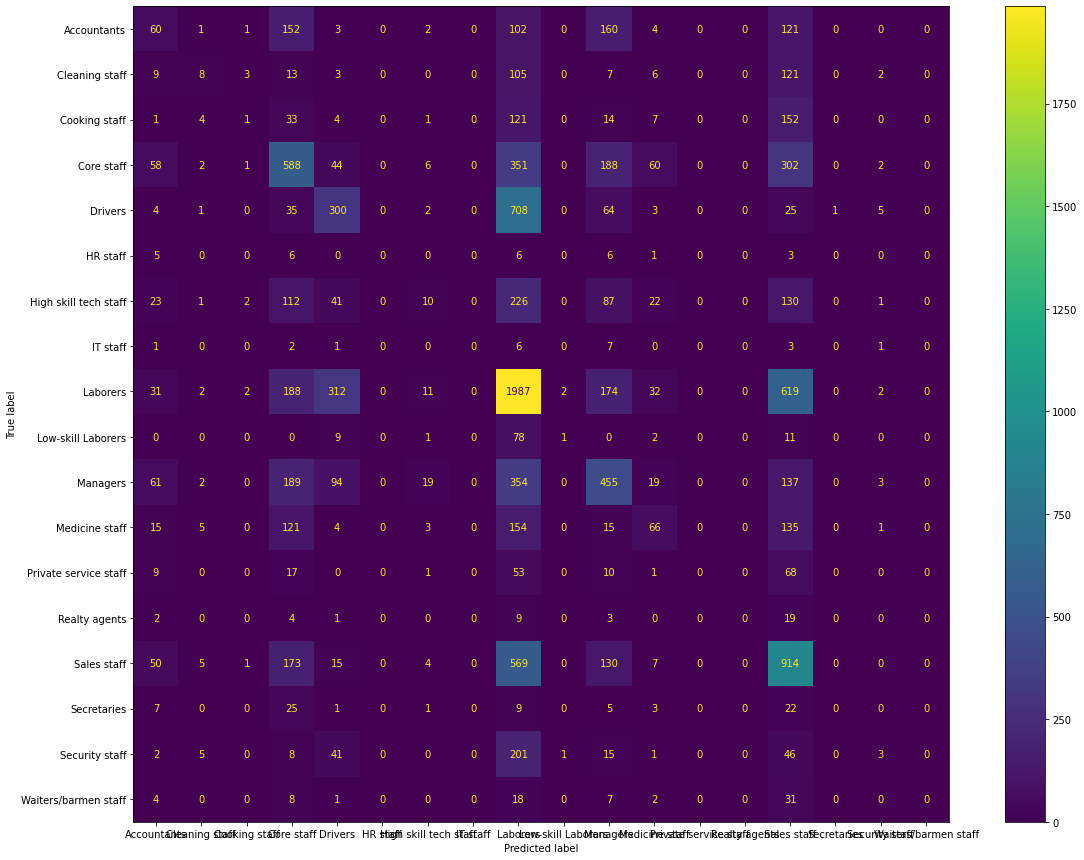

In [40]:
disp=ConfusionMatrixDisplay.from_estimator(m,valid_xs, valid_y,display_labels=class_names2pass)
fig=disp.ax_.get_figure() 
fig.set_figwidth(20)
fig.set_figheight(15) 

This baseline decision tree is garbage!

Perhaps we could use random forests

In [70]:
def rf(xs, y, n_estimators=40, max_samples=30000,
       max_features=0.5, min_samples_leaf=5):
    return RandomForestClassifier(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True,random_state=random_state).fit(xs, y)

In [71]:
rf_m = rf(xs, y);

In [74]:
preds_rf=rf_m.predict(valid_xs)

In [75]:
print(classification_report(preds_rf,valid_y,target_names=class_names2pass))

                       precision    recall  f1-score   support

          Accountants       0.10      0.22      0.14       284
       Cleaning staff       0.04      0.20      0.06        49
        Cooking staff       0.00      0.00      0.00         1
           Core staff       0.39      0.36      0.37      1766
              Drivers       0.23      0.36      0.28       732
             HR staff       0.00      0.00      0.00         0
High skill tech staff       0.00      0.19      0.01        16
             IT staff       0.00      0.00      0.00         0
             Laborers       0.62      0.39      0.48      5278
   Low-skill Laborers       0.00      0.00      0.00         1
             Managers       0.36      0.38      0.37      1265
       Medicine staff       0.12      0.32      0.18       195
Private service staff       0.00      0.00      0.00         0
        Realty agents       0.00      0.00      0.00         0
          Sales staff       0.51      0.33      0.40  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


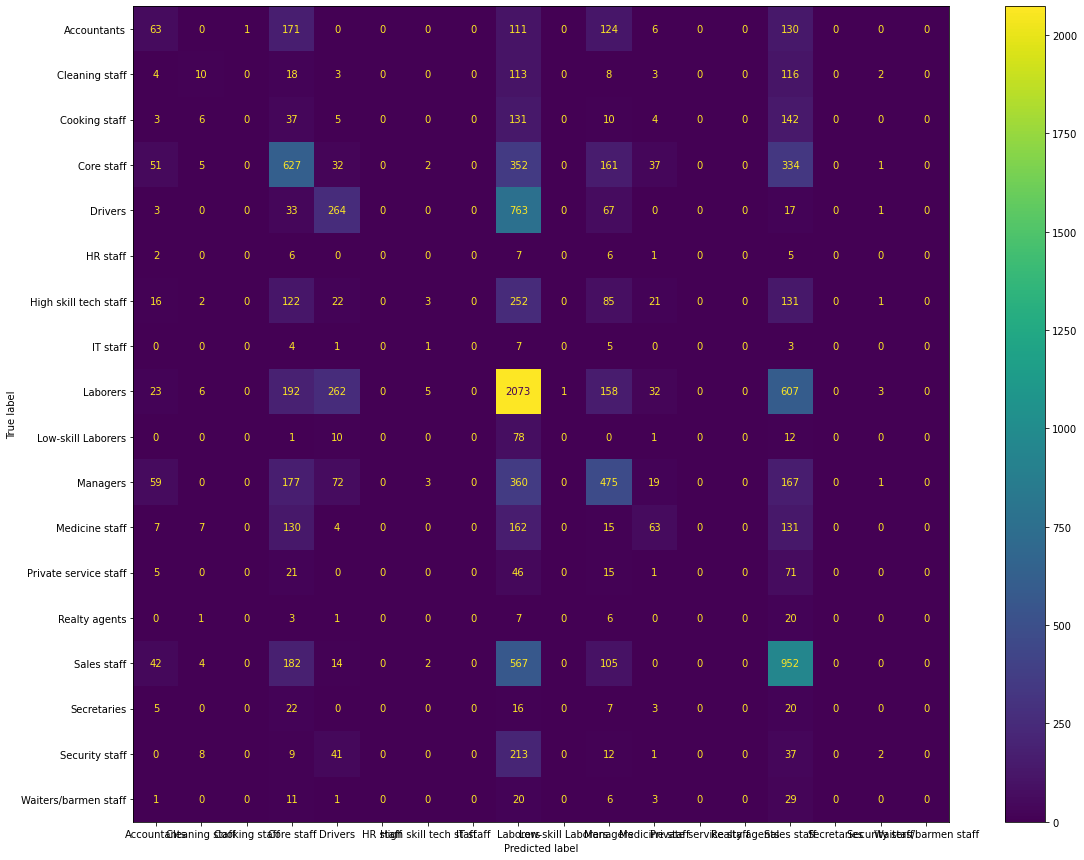

In [76]:
disp=ConfusionMatrixDisplay.from_estimator(rf_m,valid_xs, valid_y,display_labels=class_names2pass)
fig=disp.ax_.get_figure() 
fig.set_figwidth(20)
fig.set_figheight(15) 

Random forests do a bit better but still are bad

Feature Importance

In [77]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [78]:
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
0,gender,0.262247
4,education_level,0.180767
10,employment_length,0.128802
9,birth_day,0.119477
8,income,0.116306
3,income_type,0.111980
1,own_car,0.026189
5,family_status,0.008733
2,own_realty,0.008166
13,email,0.008114


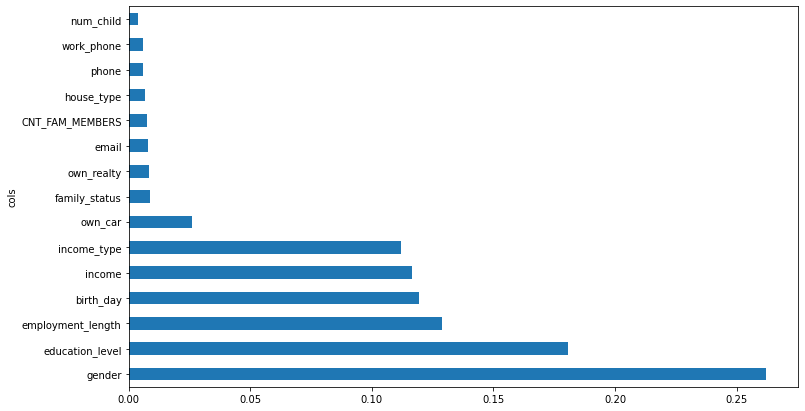

In [79]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi);

We would be using the random forest to predict the missing jobs but adding a label that the job is predicted from the random forest. Using this model might be better than simply removing na values or filling the median value of labours

In [80]:
# use same pipeline to convert df
predict_to = TabularPandas(predict_df, procs, cat, cont, y_names=dep_var)
predict_xs = predict_to.train.xs
predicted_jobs=rf_m.predict(predict_xs)
predicted_jobs_names=[class_names2pass[i] for i in predicted_jobs]
concat_df=predict_df.assign(job=predicted_jobs_names)

In [81]:
cleaned_df=pd.concat([concat_df,df,pensioners_not_working]).sort_values("id")

In [82]:
cleaned_df.shape

(90085, 17)

In [83]:
cleaned_df.isnull().sum()

id                   0
gender               0
own_car              0
own_realty           0
num_child            0
income               0
income_type          0
education_level      0
family_status        0
house_type           0
birth_day            0
employment_length    0
work_phone           0
phone                0
email                0
job                  0
CNT_FAM_MEMBERS      0
dtype: int64

In [84]:
cleaned_df.to_csv("cleaned_application.csv")